In [1]:
from ham import *
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
batch_size = 100
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_set = datasets.MNIST(os.path.expanduser('~/data'), train=True, download=True, transform=transform)
test_set = datasets.MNIST(os.path.expanduser('~/data'), train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

<IPython.core.display.Javascript object>


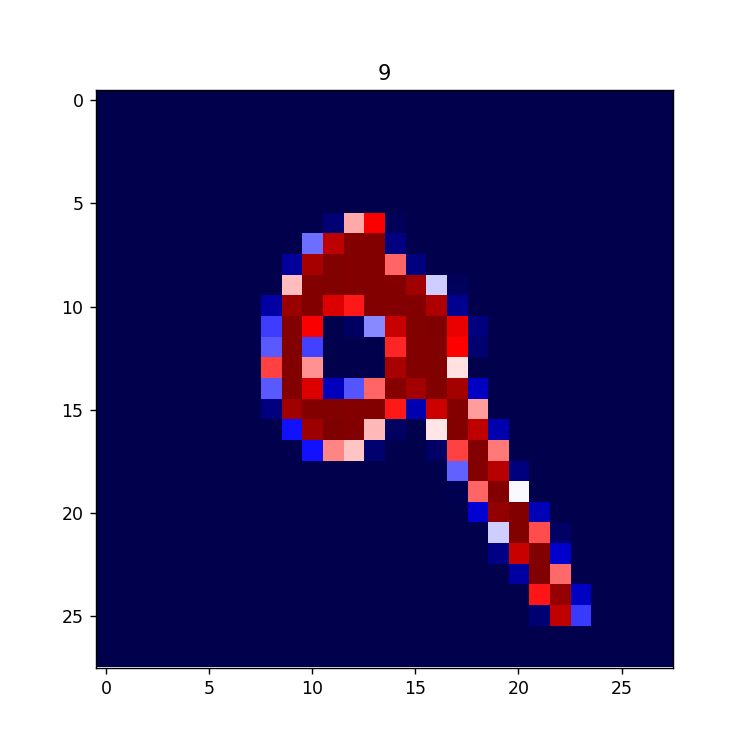

In [3]:
%matplotlib notebook

digit, label = test_set[7]
digit = digit.squeeze()

fig = plt.figure(figsize=(6, 6))
plt.imshow(digit, cmap='seismic')
plt.title(f'{label}')
plt.show()

In [4]:
n_image = 28*28
n_classes = 10
device = torch.device('cuda')
dtype = torch.float32

neurons = {
    'input': ReluNeuron(shape=(n_image,)),
    'hidden': ReluNeuron(shape=(n_image,)),
    'label': SoftmaxNeuron(shape=(n_classes,)),
}

synapses = {
    's0': DenseSynapse(n_image, n_image, n_classes, device=device, dtype=dtype)
}

connections = {
    's0': ['input', 'label', 'hidden']
}

model = HAM(neurons, synapses, connections)

In [5]:
state = model.init_state(batch_size, device=device, dtype=dtype)

In [6]:
energy = model.energy(state)
energy

IndexError: tuple index out of range